In [ ]:
# Uniform distribution is the simplest type of probability distribution. 
# A discrete uniform distribution has equal weight assigned to all outcomes. 
# Both rolling a dice and tossing a fare coin are classical uniform distributions. 
# Here we use python to simulate rolling a dice 10000 times.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#define a function to simulate rolling a dice
def dice():
    number=  [1,2,3,4,5,6]
    return random.choice(number)

series = np.array([dice() for x in range(10000)])
print (series)

[6 1 5 ... 1 4 6]


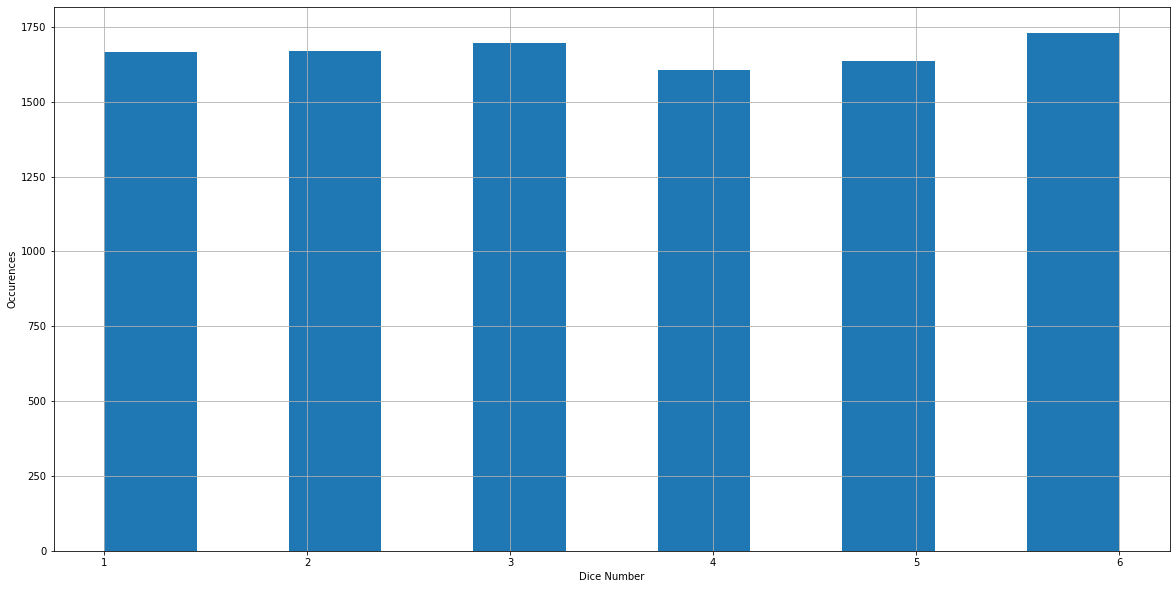

In [4]:
plt.figure(figsize = (20,10))
plt.hist(series,bins = 11,align = 'mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurences')
plt.grid()
plt.show()

In [5]:
# Let's say we want to know the frequency that the observations are less than or equal to 3. 
# In other words we want to seek the value of P(X≤3).
print (len([x for x in series if x <= 3])/float(len(series)))
print (np.mean(series))

0.503
3.5063


###### Binomial Distribution

In [8]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a<= 7:
        return 1
    else:
        return 0
# Now we are going to do the experiment 10 times:
res = [trial() for x in range(10)]
print (sum(res))

9


In [13]:
# Now we did the experiment 10 times, and the number of success is sum(res). 
# However, it just means during these 10 experiments we succeed sum(res) times. 
# If we want to see the binomial distribution, we need experiment N times. 
# When n is large enough, our frequency will approach the theoretical probability. Here we simulate each outcome 10000 times:

def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
print (binomial(8))
# The number printed above is the simulated probability that we succeed 8 times if we experiment 10 times.

0.2392


In [14]:
# For each possible outcome, we simulate the probability:
prob = []
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob,index = range(1,11))
print (prob_s)

1     0.0000
2     0.0019
3     0.0095
4     0.0357
5     0.1018
6     0.2045
7     0.2707
8     0.2286
9     0.1204
10    0.0307
dtype: float64


In [ ]:
# Now we are going to check if the simulated frequencies close enough to the theoretical probabilities. 
#Let's take X = 7 and X = 8 as example:

In [25]:
def factorial(n):
    if n == 1:
       return n
    elif n < 1:
       return ("NA")
    else:
       return n*factorial(n-1)

print ((float(factorial(10))/(factorial(7)*factorial(10-7)))*(0.7**7)*(0.3**3))
print ((float(factorial(10))/(factorial(8)*factorial(10-8)))*(0.7**8)*(0.3**2))

0.2668279319999998
0.23347444049999988


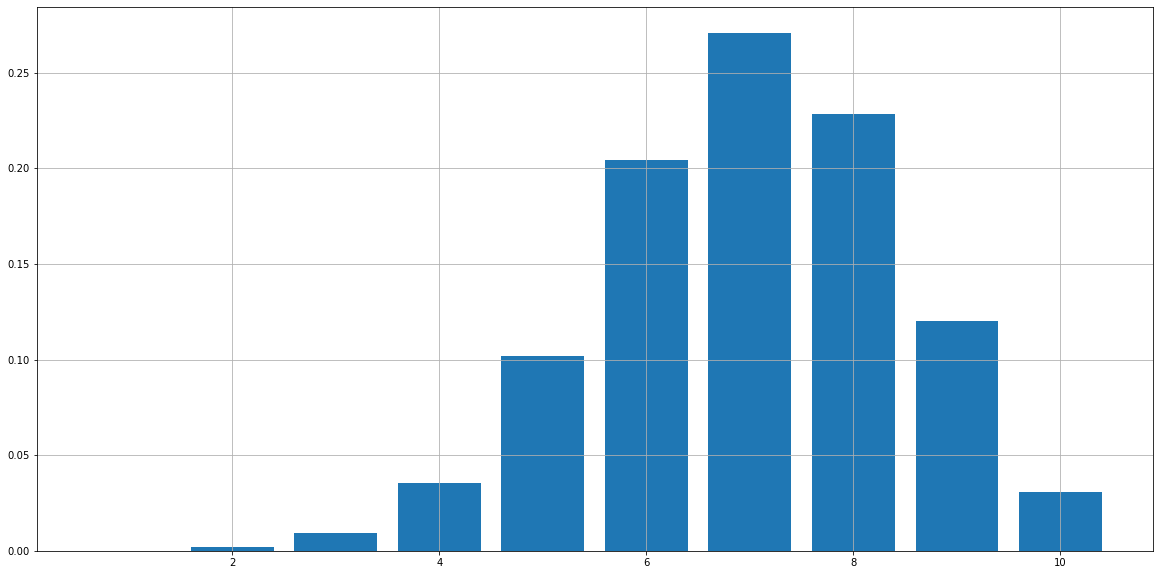

In [15]:
# As we can see, the simulated results are pretty close to the real probability. we can plot the results as follows:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

###### Normal Distribution
* if a normal distribution has a 0 mean and 1 standard deviation, we called it standard normal distribution.

In [ ]:
# Financial data is highly disordered and is considered to has lots of noise. 
# Most of the time we believe those noise follows normal distribution. 
# It's also widely believed that the return on an asset over a short period of time follows normal distribution.

In [31]:
import quandl
quandl.ApiConfig.api_key = 'NxTUTAQswbKs5ybBbwfK'
spy_table = quandl.get('WIKI/AAPL')
spy = spy_table.loc['2009':'2017',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

In [35]:
spy.head()

,Open,Close,log_return
Date,,,
2009-01-05,93.17,94.58,0.041338
2009-01-06,95.95,93.02,-0.016632
2009-01-07,91.81,91.01,-0.021845
2009-01-08,90.43,92.70,0.018399
2009-01-09,93.21,90.58,-0.023135


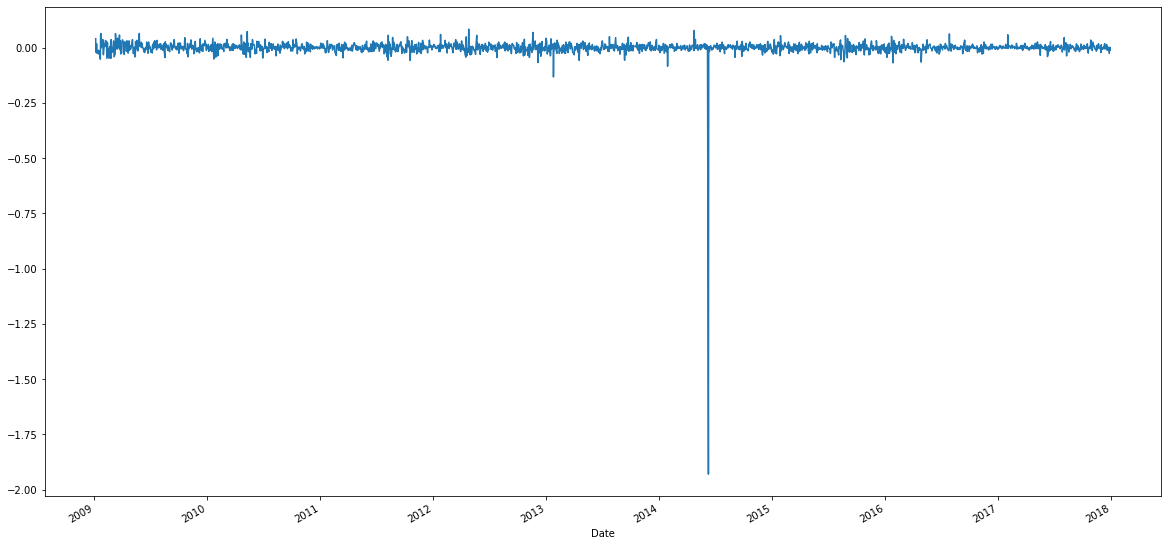

In [33]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

In [ ]:
# Above is a classic daily return chart. Let's now plot the density chart of the returns:

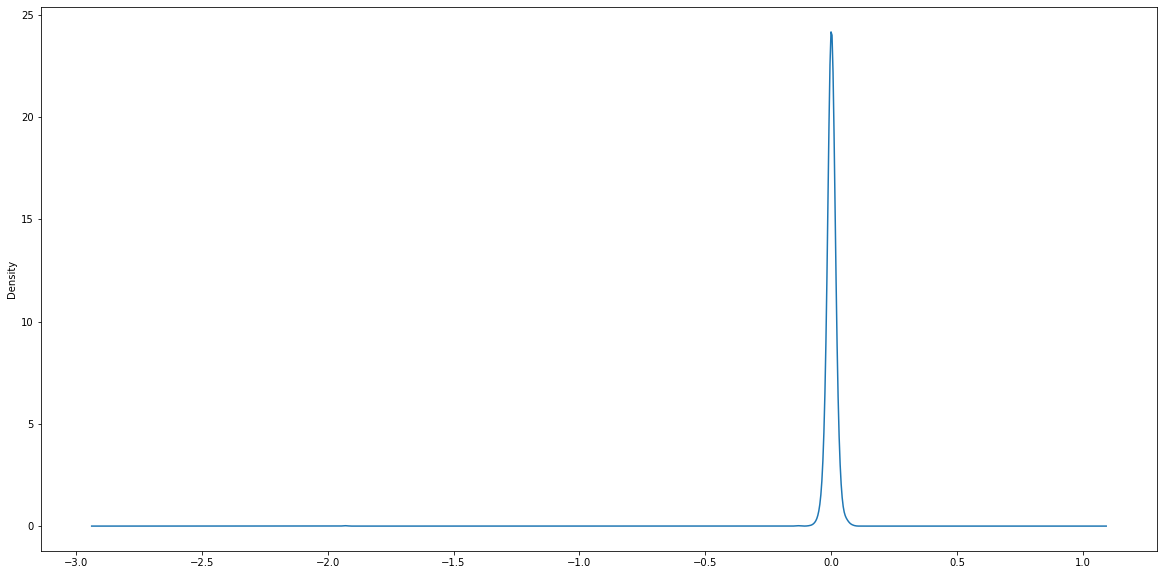

In [34]:
plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()

In [ ]:
# If we observe the x-axis and y-axis carefully, we can see the return of asset is not a standard normal distribution. 
# The peak of the standard normal distribution plot is around 0.4, while it's over 0.6 for this chart. 
# This is because the standard deviation σ of the return is obviously not 1.

<Figure size 1440x720 with 0 Axes>

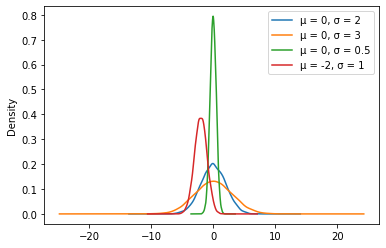

In [36]:
# We can demonstrate the normal distribution with different mean and variance by simulation:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()